In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import copy
from scipy.linalg import svd, diagsvd

c:\Users\Pedro Antônio Silva\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# lendo ratings.csv
df = pd.read_csv('ratings_small.csv')
df = df.loc[:, df.columns != 'timestamp']
# Criando matriz A
A = pd.pivot_table(data = df, index = 'userId', columns ='movieId', values = 'rating',aggfunc='mean')
A = (A.fillna(0)).to_numpy()

In [4]:
def randomiza_item_matriz(A):
    B = copy.deepcopy(A)
    while True:
        r_i = random.randint(0,len(A)-1)
        r_j = random.randint(0,len(A[r_i])-1)
        if (A[r_i][r_j])!=0:
            r_v = random.randint(0,10)
            B[r_i,r_j] = r_v
            return B, (r_i,r_j)


In [5]:
U,s,vt = np.linalg.svd(A)

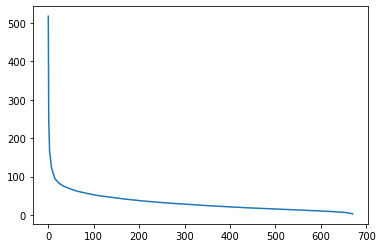

In [6]:
plt.figure()
plt.plot(s)
plt.show()

In [5]:
def estima_valor(X, s, Y,K):
    s[K:] *= 0
    S = X @ diagsvd(s, A.shape[0], A.shape[1]) @ Y
    return S

In [ ]:
erros = []
for i in range(1000):
    B, pos = randomiza_item_matriz(A)
    X, s, Y = np.linalg.svd(B)
    S = estima_valor(X,s,Y,200)

    erro = A[pos] - S[pos]
    erros.append(erro)

erros = pd.DataFrame(erros)
erros.to_csv('erros.csv', index=False)

In [19]:
dfe=pd.read_csv("erros.csv")
dfe['erros'].mean()

-0.580541631023

<AxesSubplot:>

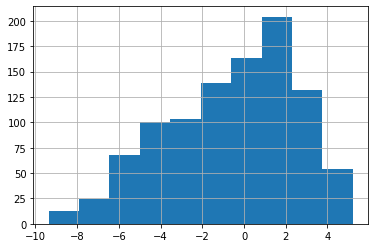

In [20]:
dfe['erros'].hist()

In [21]:
dfe

,erros
0,0.201594
1,1.259646
2,0.355608
3,1.448735
4,-0.042524
...,...
995,-2.396806
996,-2.236784
997,1.932666
998,-5.104404


In [17]:
# # Teste de Stress

erros = []
for i in range(1):
    B = A
    posicoes = []
    for i in range(1000):
        B, pos = randomiza_item_matriz(B)
        posicoes.append(pos)

    X, s, Y = np.linalg.svd(B)
    S = estima_valor(X,s,Y,200)
    for pos in posicoes:
        erro = A[pos] - S[pos]
        erros.append(erro)

# erros = pd.DataFrame(erros)
# erros.to_csv('errosStress1000.csv', index=False)

0   -0.463396
dtype: float64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

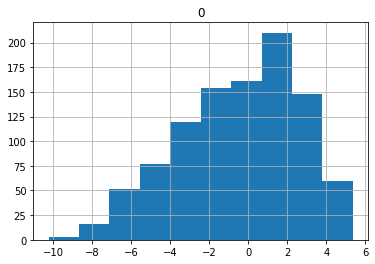

In [7]:
dfe1000 = pd.read_csv('errosStress1000.csv')
print(dfe1000.mean())
dfe1000.hist()

In [22]:
# # Teste de Stress

# erros = []
# for i in range(1):
#     B = A
#     posicoes = []
#     for i in range(int(100004/2)):
#         B, pos = randomiza_item_matriz(B)
#         posicoes.append(pos)

#     X, s, Y = np.linalg.svd(B)
#     S = estima_valor(X,s,Y,200)
#     for pos in posicoes:
#         erro = A[pos] - S[pos]
#         erros.append(erro)

# erros = pd.DataFrame(erros)
# erros.to_csv(f'errosStress{int(100004/2)}.csv', index=False)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

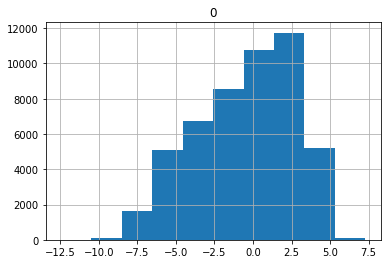

In [8]:
dfef50002 = pd.read_csv(f'errosStress{int(100004/2)}.csv')
dfef50002.hist()